In [38]:
import numpy as np
import pandas as pd
from sklearn import linear_model, datasets, tree
import matplotlib.pyplot as plt

In [50]:
# load the csv file
# store the data in 'df_admissions'
df_eg = pd.read_csv('Example1.csv')

# display first five observations using head()
print(df_eg.head())

   Age Competition Type Profit
0  old         yes  S/W   Down
1  old          no  S/W   Down
2  old          no  H/W   Down
3  mid         yes  S/W   Down
4  mid         yes  H/W   Down


In [51]:
df_eg.Age.values

array(['old', 'old', 'old', 'mid', 'mid', 'mid', 'mid', 'new', 'new',
       'new'], dtype=object)

In [52]:
df_eg.Age.values.reshape(-1,1)

array([['old'],
       ['old'],
       ['old'],
       ['mid'],
       ['mid'],
       ['mid'],
       ['mid'],
       ['new'],
       ['new'],
       ['new']], dtype=object)

In [53]:
from sklearn.preprocessing import OrdinalEncoder
le = OrdinalEncoder(categories=[["old",'mid','new']])
df_eg['Age']=le.fit_transform(df_eg.Age.values.reshape(-1,1))

In [54]:
df_eg.Age.values

array([0., 0., 0., 1., 1., 1., 1., 2., 2., 2.])

In [55]:
le = OrdinalEncoder(categories=[["yes",'no']])
df_eg['Competition']=le.fit_transform(df_eg.Competition.values.reshape(-1,1))

In [56]:
df_eg.Competition.values

array([0., 1., 1., 0., 0., 1., 1., 0., 1., 1.])

In [57]:
le = OrdinalEncoder(categories=[["S/W",'H/W']])
df_eg['Type']=le.fit_transform(df_eg.Type.values.reshape(-1,1))

In [58]:
df_eg.Type.values

array([0., 0., 1., 0., 1., 1., 0., 0., 1., 0.])

In [59]:
le = OrdinalEncoder(categories=[["Down",'Up']])
df_eg['Profit']=le.fit_transform(df_eg.Profit.values.reshape(-1,1))

In [60]:
df_eg

,Age,Competition,Type,Profit
0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0
2,0.0,1.0,1.0,0.0
3,1.0,0.0,0.0,0.0
4,1.0,0.0,1.0,0.0
5,1.0,1.0,1.0,1.0
6,1.0,1.0,0.0,1.0
7,2.0,0.0,0.0,1.0
8,2.0,1.0,1.0,1.0
9,2.0,1.0,0.0,1.0


In [61]:
X = df_eg[['Age','Competition','Type']] #Choosing only the first two input-features
Y = df_eg[['Profit']]

In [62]:
# import train-test split
from sklearn.model_selection import train_test_split
# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code
# 'test_size' returns the proportion of data to be included in the test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state = 10, test_size = 0.2)

# check the dimensions of the train & test subset using 'shape'
# print dimension of train set
print('X_train', X_train.shape)
print('y_train', y_train.shape)

# print dimension of test set
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (8, 3)
y_train (8, 1)
X_test (2, 3)
y_test (2, 1)


In [63]:
model = tree.DecisionTreeClassifier(criterion='entropy')
model.fit(X_train,y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [64]:
# labels.values.tolist()

NameError: name 'labels' is not defined

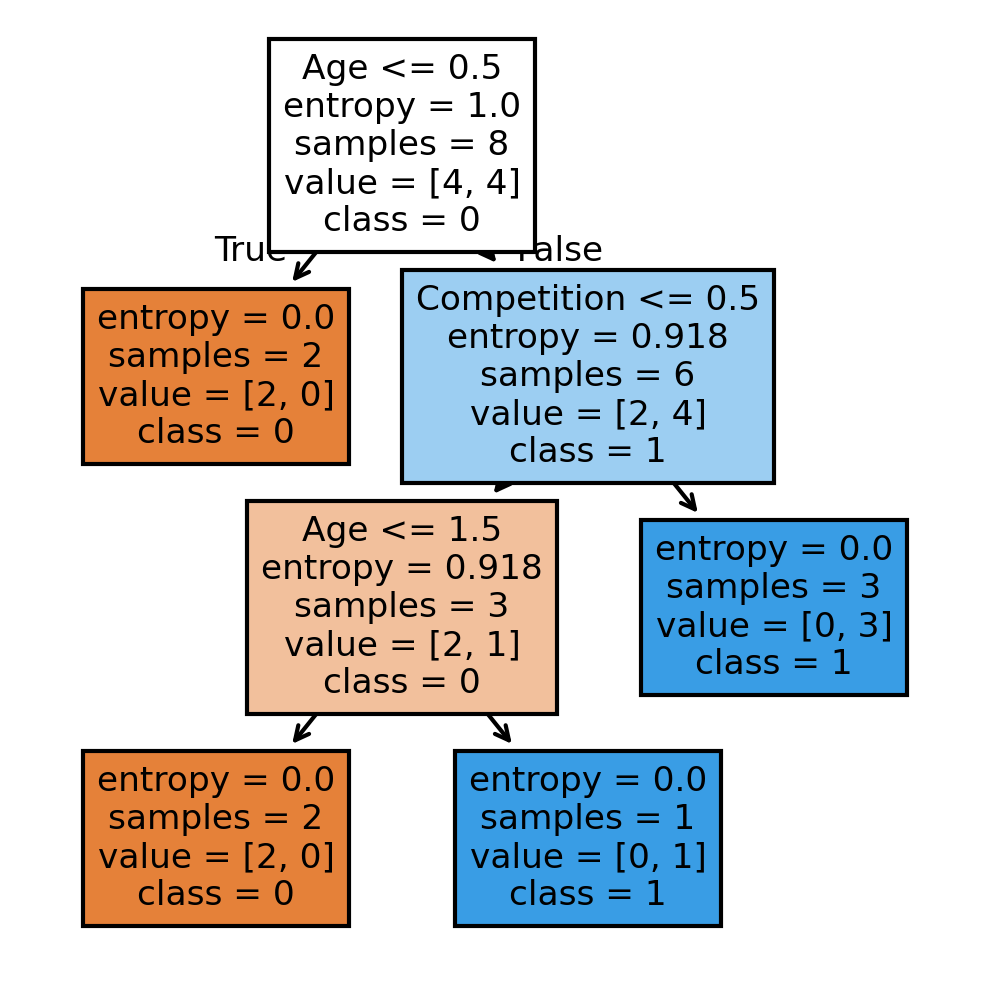

In [65]:
import matplotlib.pyplot as plt
from sklearn import tree
# Setting dpi = 300 to make image clearer than default
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
labels = X_train.columns
tree.plot_tree(model, feature_names = ['Age', 'Competition', 'Type'], class_names = ["0","1"],filled = True);

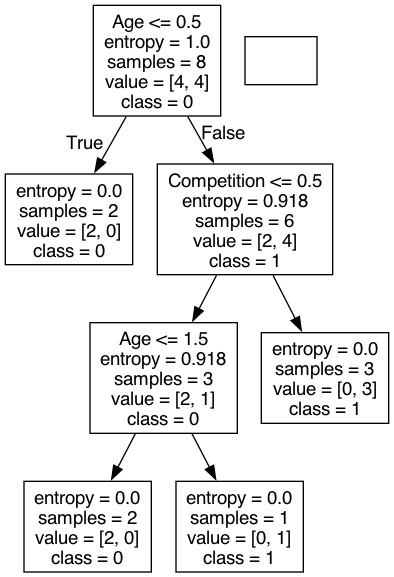

In [68]:
# save the column names in 'labels'
import pydotplus
from IPython.display import Image
labels = X_train.columns

# export a decision tree in DOT format
# pass the 'decision_tree' to export it to Graphviz
# pass the column names to 'feature_names'
# pass the required class labels to 'class_names'
dot_data = tree.export_graphviz(model, feature_names = labels, class_names = ["0","1"])

# plot the decision tree using DOT format in 'dot_data'
graph = pydotplus.graph_from_dot_data(dot_data)

# display the decision tree
Image(graph.create_png())

# double-click on the image below to get an expanded view

In [69]:
iris = datasets.load_iris()
X = iris.data #Choosing only the first two input-features
Y = iris.target

number_of_samples = len(Y)
#Splitting into training, validation and test sets
random_indices = np.random.permutation(number_of_samples)
#Training set
num_training_samples = int(number_of_samples*0.7)
x_train = X[random_indices[:num_training_samples]]
y_train = Y[random_indices[:num_training_samples]]
#Validation set
num_validation_samples = int(number_of_samples*0.15)
x_val = X[random_indices[num_training_samples : num_training_samples+num_validation_samples]]
y_val = Y[random_indices[num_training_samples: num_training_samples+num_validation_samples]]
#Test set
num_test_samples = int(number_of_samples*0.15)
x_test = X[random_indices[-num_test_samples:]]
y_test = Y[random_indices[-num_test_samples:]]

In [70]:
model = tree.DecisionTreeClassifier()
model.fit(x_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [71]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

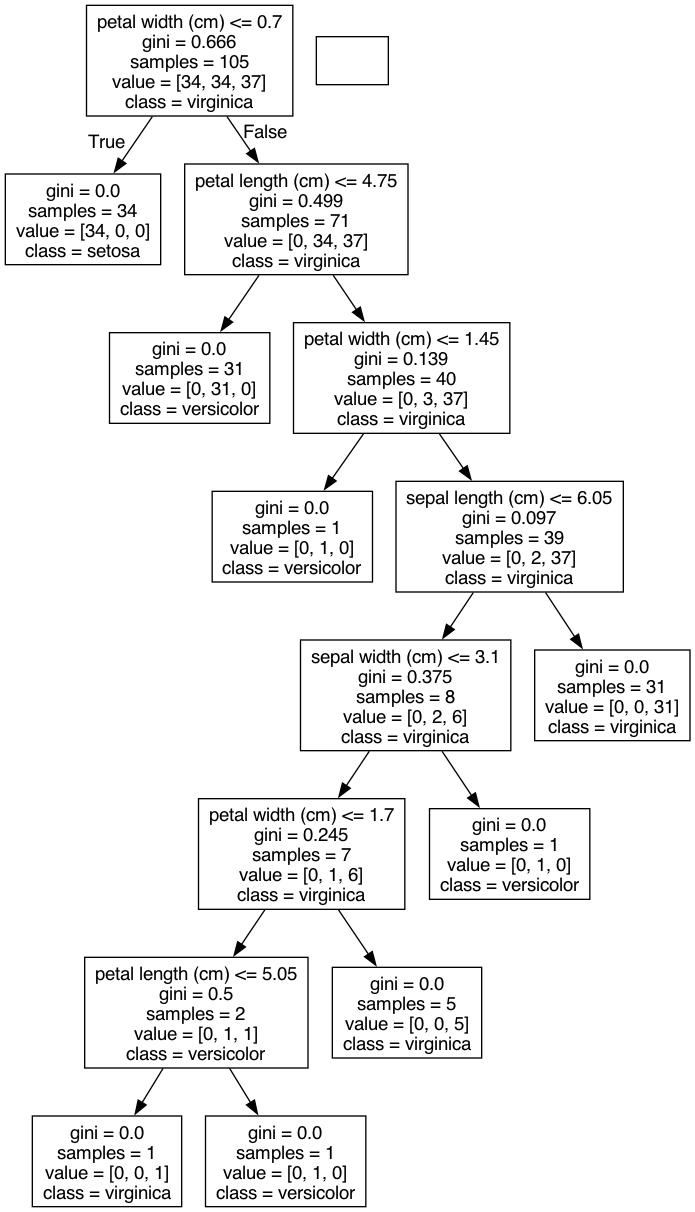

In [72]:

# import the functions for visualizing the decision tree
import pydotplus
from IPython.display import Image
# save the column names in 'labels'
labels = iris.feature_names

# export a decision tree in DOT format
# pass the 'decision_tree' to export it to Graphviz
# pass the column names to 'feature_names'
# pass the required class labels to 'class_names'
dot_data = tree.export_graphviz(model, feature_names = labels, class_names = iris.target_names)

# plot the decision tree using DOT format in 'dot_data'
graph = pydotplus.graph_from_dot_data(dot_data)

# display the decision tree
Image(graph.create_png())

# double-click on the image below to get an expanded view